In [30]:
import sys
import json
sys.path.append("../")
from src.prediction_utils import greedy_prediction_NIC
from src.NIC_preprocessing import load_preprocessed
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tqdm

In [3]:
# Loading data

preprocessed_data = load_preprocessed("..", filter_objects=["word_to_index", "test_captions", "test_features"])
word_to_index = preprocessed_data["word_to_index"]
test_captions, test_features = preprocessed_data["test_captions"], preprocessed_data["test_features"]

index_to_word = {word: idx for idx, word in word_to_index.items()}

max_length = 38
IMAGES_PATH = "../data/Flickr_Data/Images/"

In [4]:
# Loading model
model = tf.keras.models.load_model("../models/E100_B300/NIC_100.h5")

2022-01-25 19:36:01.394133: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-25 19:36:01.399027: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/softs/spack/opt/spack/linux-centos7-cascadelake/gcc-9.2.0/anaconda3-2020.02-jamygl2koq6hlcw6vpl7w6wajowcplw6/lib
2022-01-25 19:36:01.399056: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-25 19:36:01.399091: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ruche01.cluster): /proc/driver/nvidia/version does not exist
2022-01-25 19:36:01.399731: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the

100%|██████████| 16/16 [00:10<00:00,  1.47it/s]


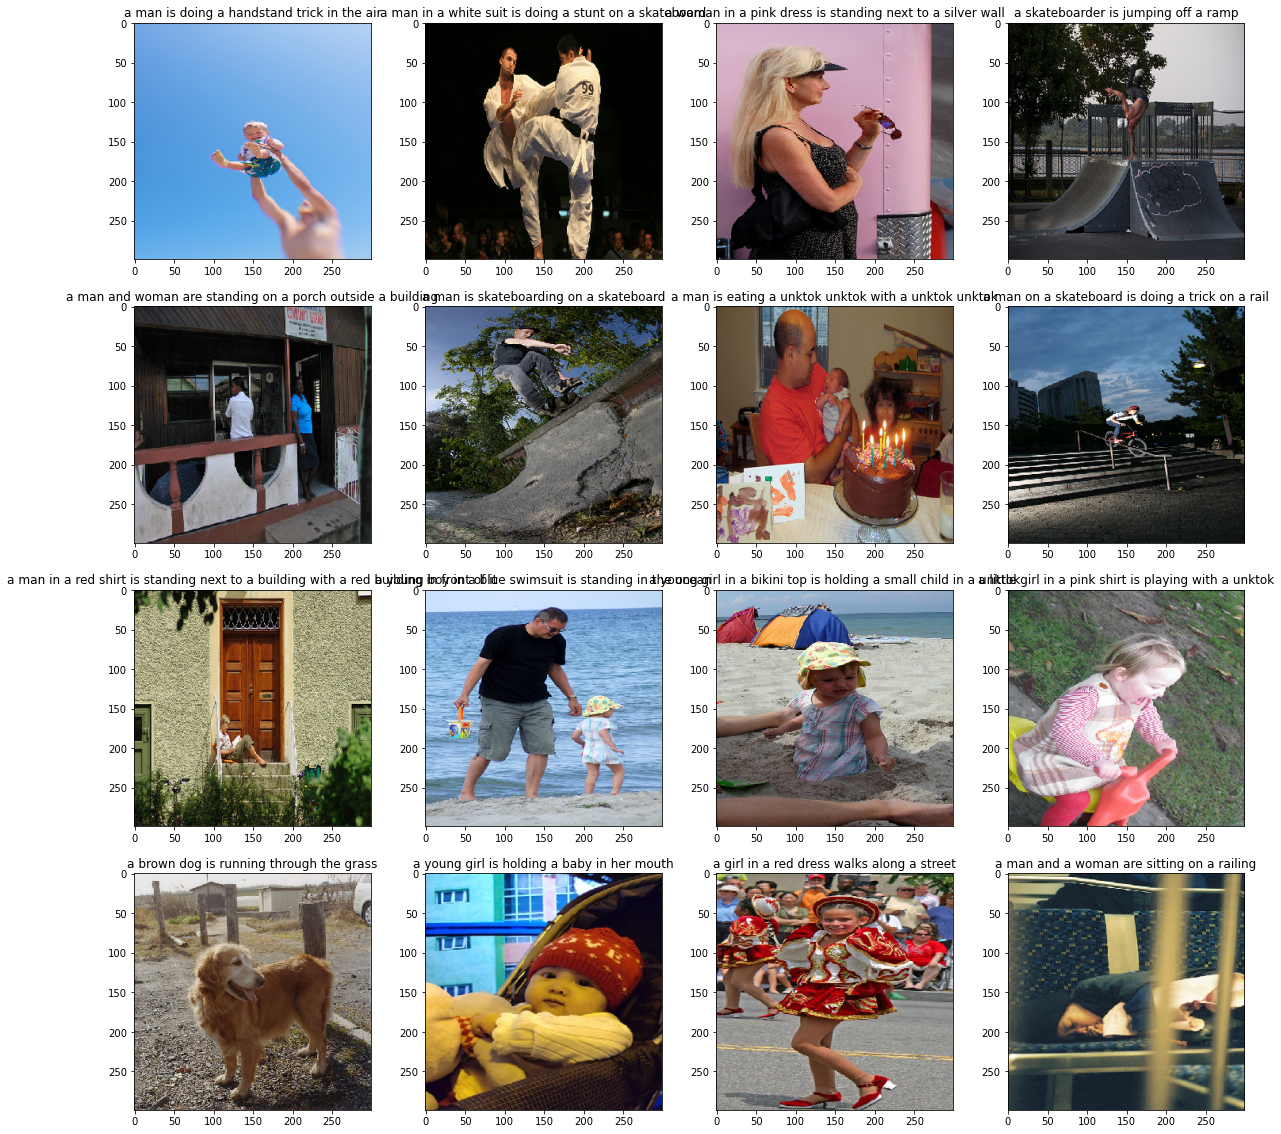

In [32]:
_, ax = plt.subplots(4, 4, figsize=(20, 20))
offset = 40

progress = tqdm.tqdm(total=ax.shape[0]*ax.shape[1])
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        test_id = list(test_features.keys())[offset + i*ax.shape[1] + j]
        img = tf.keras.preprocessing.image.load_img(IMAGES_PATH + test_id + ".jpg", target_size=(299, 299))
        ax[i, j].imshow(img)
        ax[i, j].set_title(
            greedy_prediction_NIC(
                np.array(test_features[test_id]).reshape((1, -1)), 
                word_to_index, index_to_word, max_length, model
            )
        )
        progress.update()
progress.close()